In [1]:
import numpy as np
import sunpy
import sunpy.map
from sunpy.coordinates import propagate_with_solar_surface, Helioprojective
import astropy
from astropy import units as u
from astropy import constants as const 
from astropy.visualization import ImageNormalize, AsinhStretch
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
from copy import deepcopy

from sun_blinker import SunBlinker


In [2]:
hri_map = sunpy.map.Map("../../src/coalign_map/20221024/hri_174_map_shifted_toaia.fits")

In [3]:
aia_171_map = sunpy.map.Map("../../src/AIA/20221024/171/lvl15/aia.lev1_euv_12s.2022-10-24T192003Z.171.image.fits")

In [4]:
def repro_hri_map(map, height = 0*u.Mm):
    map_new = deepcopy(map)
    aia_helioproj = aia_171_map.coordinate_frame
    hri_center_aia_helioproj = map.center.transform_to(aia_helioproj)

    map_new.meta["rsun_ref"] = map.meta["rsun_ref"] + height.to_value(u.m)
    target_wcs = sunpy.map.make_fitswcs_header([2500,2500],
                                                SkyCoord(hri_center_aia_helioproj.Tx, hri_center_aia_helioproj.Ty, 
                                                         frame="helioprojective",observer="earth", obstime=aia_171_map.date,
                                                         rsun=map_new.coordinate_frame.rsun),
                                                scale=u.Quantity([map_new.scale.axis1*map_new.dsun/aia_171_map.dsun]*2),
                                                )
    
    return map_new.reproject_to(target_wcs)

In [5]:
hri_map_repro_0 = repro_hri_map(hri_map, height = 0*u.Mm)
hri_map_repro_3 = repro_hri_map(hri_map, height = 3*u.Mm)
hri_map_repro_10 = repro_hri_map(hri_map, height = 10*u.Mm)

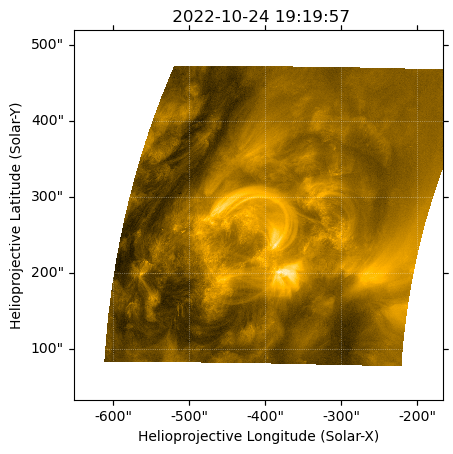

In [6]:
hri_map_repro_0.plot()

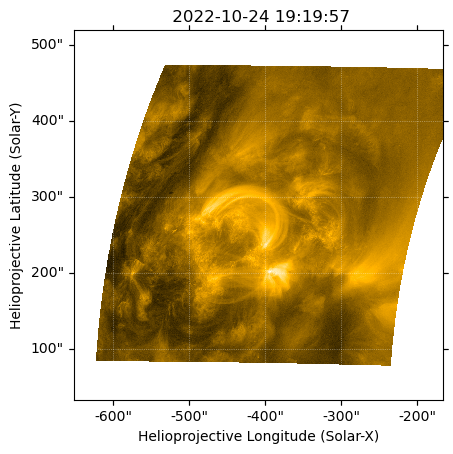

In [7]:
hri_map_repro_10.plot()

In [8]:
SunBlinker(hri_map_repro_0, hri_map_repro_10)

In [9]:
hri_map_3 = deepcopy(hri_map)
hri_map_3.meta["rsun_ref"] = hri_map_3.meta["rsun_ref"] + 2.8e6

In [10]:
aia_171_map_3 = deepcopy(aia_171_map)
aia_171_map_3.meta["rsun_ref"] = aia_171_map_3.meta["rsun_ref"] + 2.8e6

In [11]:
SunBlinker(hri_map_3, aia_171_map_3,reproject=True)